#  Lab 13: Clustering
In this lab, we will explore various concepts in uusuperviesd learning and it's types:

1. Unsupervised Learning
2. K-means
3. K-means++


## Unsupervised Learning:
unsupervised learning is a machine learning technique in which models are not supervised using training dataset. Instead, models itself find the hidden patterns and insights from the given data. It can be compared to learning which takes place in the human brain while learning new things [[1](https://www.javatpoint.com/unsupervised-machine-learning)].

The goal of unsupervised learning is to find the underlying structure of dataset, group that data according to similarities, and represent that dataset in a compressed format.

we Unsupervised Learning for reasons:

1.  for finding useful insights from the data.
2.  similar as a human learns to think by their own experiences, which makes it closer to the real AI.
3. it works on unlabeled and uncategorized data which make unsupervised learning more important.
4. In real-world, we do not always have input data with the corresponding output so to solve such cases, we need unsupervised learning.

<center>

![link text](https://static.javatpoint.com/tutorial/machine-learning/images/unsupervised-machine-learning-1.png)

##Types of Unsupervised Learning Algorithm:
<center>

![link text](https://static.javatpoint.com/tutorial/machine-learning/images/unsupervised-machine-learning-2.png)

<center>


1. **Clustering:** This type of unsupervised learning involves grouping similar data points together based on certain features or characteristics. The goal is to identify patterns or clusters within the data without any predefined labels.

2. **Association** : In this type of unsupervised learning, the focus is on discovering interesting relationships or associations between variables in large datasets. The goal is to identify patterns that show the likelihood of certain variables occurring together.

**Common clustering algorithms include K-means clustering [[2](https://www.datacamp.com/blogintroduction-to-unsupervised-learning)].**

### K-means
K-means is an unsupervised ML technique to cluster **unlabeled** dataset to k clusters where each datapoint belongs to a cluster with the nearest centroid.
> Question: What's the pros and cons of K-means?  

**Examplw how to implement K-means clustering:**

#### 1. Data generation

To create a synthetic dataset that mimics real-world data with clear clusters.

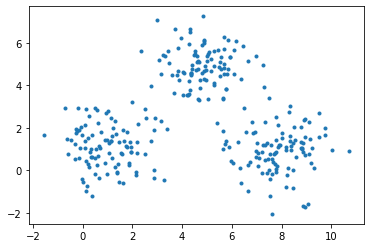

In [ ]:

#Import Libraries:
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt


#Define Cluster Centers:
real_centers = [[1,1], [5,5], [8, 1]]
X, y = make_blobs(n_samples=300, centers=real_centers, n_features=2,
                   random_state=0,)  #Generate Data


#Plot the Data:
plt.scatter(X[:,0], X[:,1], marker='.')

#### Exercise 1:

Complete the follwing code. Implement (fit and predict) K-mean algorithm.

In [ ]:
# Custom KMeans Implementation
class KMeans(BaseEstimator, ClassifierMixin):

    def __init__(self, k=3, centers=None):
        self.k = k
        self.centers = centers

    def _predict(self, X, centers):
        # Calculate the pairwise distance between each sample in X and the centroids.
        # Write your code here


    def predict(self, X, y=None):
        return self._predict(X, self.centers)

    def fit(self, X, y=None):
        k = self.k
        c = X.shape[1]
        if self.centers is None:
            mean = np.mean(X, axis=0)
            std = np.std(X, axis=0)
            self.centers = np.random.randn(k, c) * std + mean

        centers = deepcopy(self.centers)
        while True:
            # Predict clusters of each point using the current clusters
            # Write your code here
            clusters = ...............

            # Calculate mean for every cluster and update the center in 'centers_new'
            # Write your code here
            centers_new = ..............................
            if np.allclose(centers, centers_new, atol=1e-6):
                break
            centers = centers_new

        self.centers = centers
        return self

    def score(self, X, y=None):
        return 0


In [ ]:
# Test the implementation
my_kmeans = KMeans(k=3)
my_kmeans.fit(X)

# Use sklearn's KMeans for comparison
sklearn_kmeans = SklearnKMeans(n_clusters=3, random_state=0, n_init=10)
sklearn_kmeans.fit(X)

# Assert that the centers are close
assert np.allclose(np.sort(my_kmeans.centers, axis=0), np.sort(sklearn_kmeans.cluster_centers_, axis=0), atol=1e-1), "Centers do not match!"


- Let's visualize the clusters.

In [ ]:
!pip3 install mlxtend

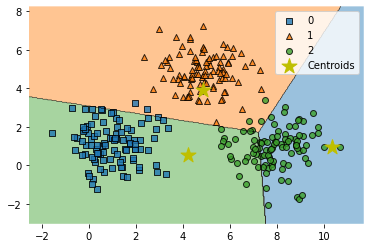

In [ ]:
from mlxtend.plotting import plot_decision_regions

clf = KMeans(3, None).fit(X,y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.scatter(clf.centers[:,0], clf.centers[:,1], marker='*', c='y', s=250,label='Centroids')
plt.legend()

> Question: Run the previous cell several times and analyse the cluster assignments. What do you observe? Why?


---



### K-Means++

 K-Means++ is an enhancement of the traditional K-Means algorithm that improves the quality of the centroids' initialization. It selects the initial cluster centers intelligently to avoid poor local optima, leading to faster convergence and more accurate clustering results. This initialization method helps in achieving better clustering performance and mitigates the sensitivity to the initial centroids' selection [[3](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering//)].

K-means++
1. Choose one center uniformly at random from among the data points.
2. For each data point x, compute $D(x)$.
3. Choose the next centroid using a weighted probability distribution where a point x is chosen with probability proportional to  $𝐷(𝑥)^2$ .
4. Repeat until you have k points.

$D(x)$: the distance betweem x and the closest center




### Exercise 2:

complete the following code. Implement K-means++ algorithm for selecting the intial points.




In [ ]:
from numpy.random import choice

def choose(X, prob):
    # Return one point of X chosen randomly with probablity p
    # USE choice function in np.random (3 lines):
    idx = choice(X.shape[0], 1, p=prob)
    return X[idx]

def kmeans_pp(X, k):
    n = X.shape[0]
    weights = np.ones(n) / n
    centers = []
    while len(centers) < k:
        # Choose a centroid with the current weights
        centroid = choose(X, weights)
        centers.extend(centroid)


        # Calculate the pair-wise distances
        # between the datapoints X and the current centers
        # get min distance then square it.
        # Obtain new probabilities in weights.

        # Write your code here
        ...

    return np.array(centers)

initial_centers = kmeans_pp(X, 3)

In [ ]:
# Test the implementation
my_kmeans = KMeans(k=3, centers=initial_centers)
my_kmeans.fit(X)

# Use sklearn's KMeans for comparison
sklearn_kmeans = SklearnKMeans(n_clusters=3, random_state=0, n_init=10)
sklearn_kmeans.fit(X)

# Assert that the centers are close
assert np.allclose(np.sort(my_kmeans.centers, axis=0), np.sort(sklearn_kmeans.cluster_centers_, axis=0), atol=1e-1), "Centers do not match!"



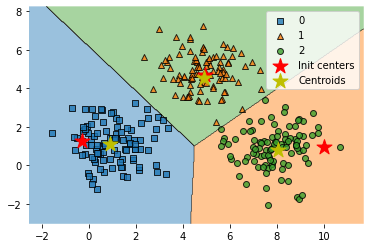

In [ ]:
clf = KMeans(3, initial_centers).fit(X,y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.scatter(initial_centers[:,0], initial_centers[:,1], marker='*', c='red', s=250,label='Init centers')
plt.scatter(clf.centers[:,0], clf.centers[:,1], marker='*', c='y', s=250,label='Centroids')
plt.legend()

## Real world example of clustering
The dataset is in the form of a 11463 x 5812 matrix of word counts, containing 11463 words and 5811 NIPS conference papers (the first column contains the list of words). Each column contains the number of times each word appears in the corresponding document. The names of the columns give information about each document and its timestamp in the following format: Xyear_paperID. We will use Kmeans on this dataset to identify papers related to the same topic (unknown).


1.  Download the dataset

In [ ]:
import requests
import os
import re
import pandas as pd

# function used to download the dataset
def wget(url, filename = None):
    # allow redirects - in case file is relocated
    resp = requests.get(url, allow_redirects=True)
    # this can also be 2xx, but for simplicity now we stick to 200
    # you can also check for `resp.ok`
    if resp.status_code != 200:
        print(resp.status_code, resp.reason, 'for', url)
        return

    # try to extract filename from url
    if filename is None:
        # start with http*, ends if ? or # appears (or none of)
        m = re.search("^http.*/([^/\?#]*)[\?#]?", url)
        filename = m.group(1)
        if not filename:
            raise NameError(f"Filename neither given, nor found for {url}")

    # what will you do in case 2 websites store file with the same name?
    if os.path.exists(filename):
        raise OSError(f"File {filename} already exists")

    with open(filename, 'wb') as f:
        f.write(resp.content)
        print(f"File saved as {filename}")

In [ ]:
# Download this file from Moodle in case of any problem with the link
dataset_name = "NIPS_1987-2015.csv"
wget("https://archive.ics.uci.edu/ml/machine-learning-databases/00371/NIPS_1987-2015.csv", dataset_name)

Date: Mon, 21 Nov 2022 12:58:29 GMT
Server: Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips SVN/1.7.14 Phusion_Passenger/4.0.53 mod_perl/2.0.11 Perl/v5.16.3
Last-Modified: Wed, 23 Nov 2016 21:26:22 GMT
ETag: "7f6613a-541fe8a636799"
Accept-Ranges: bytes
Content-Length: 133587258
Keep-Alive: timeout=5, max=100
Connection: Keep-Alive
Content-Type: application/x-httpd-php

File saved as nips_1987-2015.csv


In [ ]:
df = pd.read_csv(dataset_name)
df.head(5)

,Unnamed: 0,1987_1,1987_2,1987_3,1987_4,1987_5,1987_6,1987_7,1987_8,1987_9,...,2015_394,2015_395,2015_396,2015_397,2015_398,2015_399,2015_400,2015_401,2015_402,2015_403
0,abalone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,abbeel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,abbott,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,abbreviate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,abbreviated,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# remove the first column
df = df.iloc[: , 1:]

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Exercise 3:

Apply PCA with **2 components** on the dataset, train a Kmeans with **4 clusters** and plot the results.

In [ ]:
# Write your code here

In [ ]:
# prompt: assert statement

assert np.allclose(np.sort(my_kmeans.centers, axis=0), np.sort(sklearn_kmeans.cluster_centers_, axis=0), atol=1e-1), "Centers do not match!"


> Question: In the previous task is there can you conclude on which value between 2 and 4 is best value for number of cluster $k$? Describe a problem where you can have an idea on the number clusters needed.
Complete the self-practice task to understand how to choose $k$ automatically

## When Kmeans is inefficient

In this section, we will apply K-means clustering to different datasets and interpret the results. We aim to understand the limitations of K-means and why it may not work well on certain datasets.

- First, let's complete the k_means_and_plot function to fit K-means and visualize the results.

In [ ]:
def k_means_and_plot(X, y, k=2, n_init=10):
    initial_centers = kmeans_pp(X, k)
    clf = KMeans(n_clusters=k, init=initial_centers, n_init=n_init).fit(X,y)
    y_pred = clf.predict(X)
    plot_decision_regions(X=X, y=y_pred, clf=clf, legend=2)
    #plt.scatter(initial_centers[:,0], initial_centers[:,1], marker='*', c='red', s=250,label='Init centers')
    plt.scatter(clf.cluster_centers_[:,0], clf.cluster_centers_[:,1], marker='*', c='y', s=250,label='Centroids') # Use cluster_centers_
    plt.legend()

- Apply K-means on different datasets

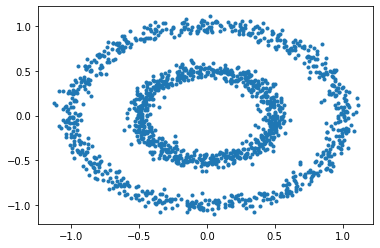

In [ ]:
# Dataset 1: Circles
from sklearn.datasets import make_circles
n_samples = 1500
X, y = make_circles(n_samples=n_samples, factor=.5, noise=.05)
plt.scatter(X[:,0], X[:,1], marker='.')

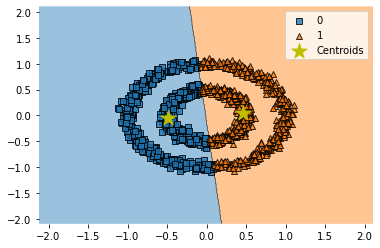

In [ ]:
k_means_and_plot(X, y)

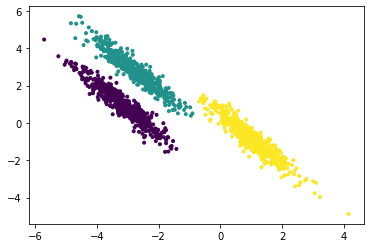

In [ ]:
# # Dataset 2: Anisotropicly distributed data
random_state = 170
X, y_aniso = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y_aniso)
plt.scatter(X_aniso[:,0], X_aniso[:,1], marker='.', c=y_aniso)

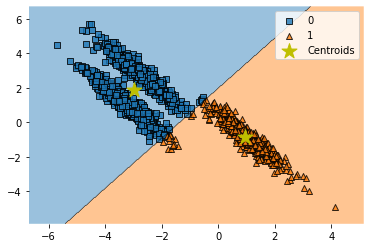

In [ ]:
k_means_and_plot(X_aniso, y_aniso)

# Conclusion:

In Lab 13, we explored the K-means clustering algorithm, a fundamental unsupervised machine learning technique used to partition data into distinct groups based on similarity. Through a series of exercises and practical examples, we gained insights into the strengths and limitations of K-means clustering.

By the end of this lab, you should have a solid foundation in applying K-means clustering, understanding its strengths and weaknesses, and making informed decisions about its use in various contexts.